# Part I - (Ford Go Bike)
## by Shereen Onyango

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
# To Check for null values for each column
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We can see a few columns have missing data. 

In [5]:
#to drop null values sinve they are insignificant.
df=df.dropna()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [6]:
# To Check for null values for each column
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [7]:
df.duplicated().sum()

0

None of the rows have duplicated data.

We now head to cleaning and sorting out the quality issues with the data types in the dataset:

### Data Cleaning

In [8]:
# We make a new copy.
df_new = df.copy()

In [9]:
# To change the various xcolumns to the correct type:
dtype= {'start_station_id': 'object',
        'end_station_id': 'object',
        
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',

        'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'bike_id': 'object',
        'user_type': 'category'}

df_new = df_new.astype(dtype)

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null object
start_station_longitude    174952 non-null object
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null object
end_station_longitude      174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(11

In [11]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.7896,-122.401,13,Commercial St at Montgomery St,37.7942,-122.403,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.7693,-122.427,3,Powell St BART Station (Market St at 4th St),37.7864,-122.405,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.7748,-122.447,70,Central Ave at Fell St,37.7733,-122.444,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.8046,-122.272,222,10th Ave at E 15th St,37.7927,-122.249,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.7704,-122.391,323,Broadway at Kearny,37.798,-122.406,5200,Subscriber,1959.0,Male,No


In [12]:
df_new.shape

(174952, 16)

In [39]:
# save the cleaned data to csv file
df_new.to_csv('fordgobike-tripdata_clean.csv',index=None)

### What is the structure of your dataset?

The dataset includes 183412 rows(observations) and 16 columns(variables). After cleaning the dataset, we are left with 174952 rows and 16 columns.
### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset are start_time,end_time, gender, user_type column, duration_sec.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the location of the bike rider/station they start and end their journey, their genders to see who rides more and duration to see how long, and on which days do we have the longest rides.

## Univariate Exploration

In [13]:
# Extract minute,day,week,month from the start_time
df_new['duration_min'] = df_new['duration_sec']/60

df_new['start_date'] = df_new.start_time.dt.strftime('%Y-%m-%d')
df_new['start_hour_of_day'] = df_new.start_time.dt.strftime('%H')
df_new['start_day_of_week'] = df_new.start_time.dt.strftime('%A')
df_new['start_month'] = df_new.start_time.dt.strftime('%b')
df_new.head(2)

df_new['year_month'] = df_new['start_time'].dt.to_period('M')

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null object
start_station_longitude    174952 non-null object
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null object
end_station_longitude      174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_min               174952 non-null float64
start_date          

#### Which day has the highest number of starts?

In [15]:
# To show the number of rides started for each day
df_new.start_day_of_week.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day_of_week, dtype: int64

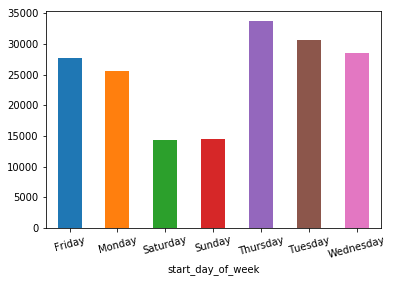

In [16]:
df_new.groupby(['start_day_of_week']) ['start_day_of_week'].count().plot(kind='bar');
plt.xticks(rotation=15);

Most rides started on Thursday, while Saturday had the least.

#### Exploring the User types

In [17]:
df_new.groupby(['user_type']) ['duration_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,16566.0,1310.656103,3399.899962,62.0,498.0,780.0,1230.0,83519.0
Subscriber,158386.0,640.551305,1314.319131,61.0,312.0,490.0,750.0,84548.0


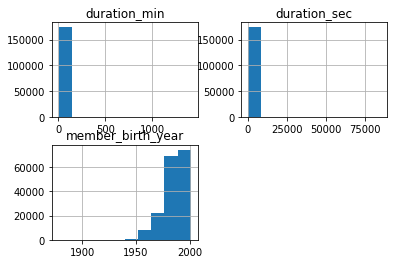

In [18]:
df_new.hist();

In [19]:
df_new.user_type.unique()

[Customer, Subscriber]
Categories (2, object): [Customer, Subscriber]

In [20]:
df_new.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [21]:
df_new.user_type.value_counts() / df_new.shape[0]

Subscriber    0.905311
Customer      0.094689
Name: user_type, dtype: float64

90% of riders are subscribers.

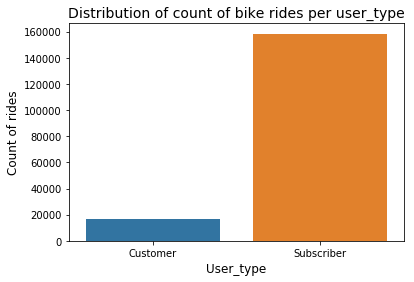

In [22]:
# Plotting the distribution:

sb.countplot(data=df_new, x='user_type')
plt.xlabel('User_type', fontsize=12)
plt.ylabel('Count of rides', fontsize=12)
plt.title('Distribution of count of bike rides per user_type', fontsize=14);

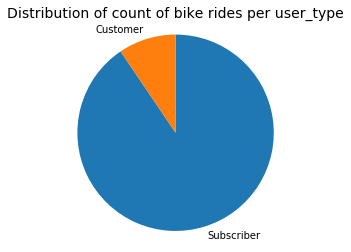

In [23]:
# To plot the same distribution via pie chart
sorted_counts = df_new['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');
plt.title('Distribution of count of bike rides per user_type', fontsize=14);

In both formats we see the subscribers outnumbering customers.

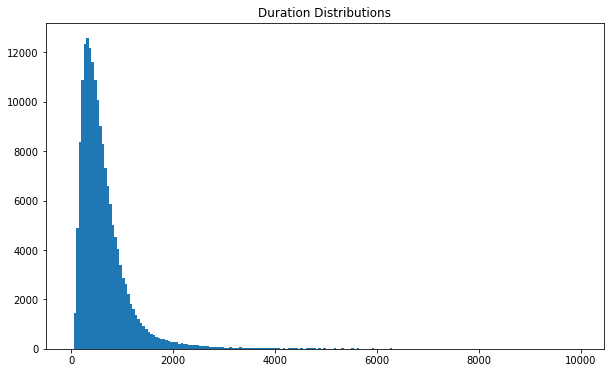

In [24]:
# Overall trip duration average

plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

plt.hist(df_new.duration_sec, bins=bins)
plt.title('Duration Distributions');

The distribution is skewed to the right.

In [25]:
# Average duration of trips
df_new.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

The average trip duration is 11.7 minutes.

Text(0.5,1,'Distribution of trip duration')

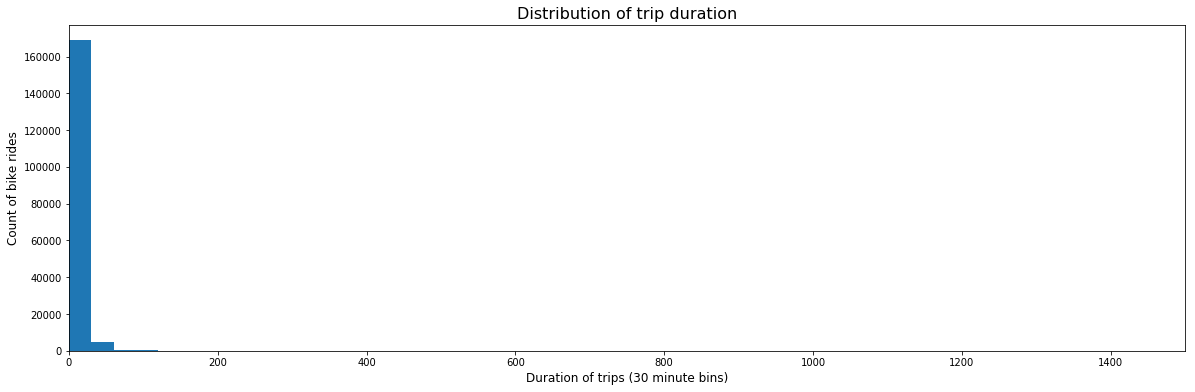

In [26]:
bins = np.arange(0, df_new.duration_min.max(0)+1, 30)
plt.figure(figsize=(20,6))
plt.hist(data=df_new, x='duration_min', bins=bins)
plt.xlim((0,1500))
plt.ylabel('Count of bike rides', fontsize=12)
plt.xlabel('Duration of trips (30 minute bins)', fontsize=12);
plt.title('Distribution of trip duration', fontsize=16)

### Datetime

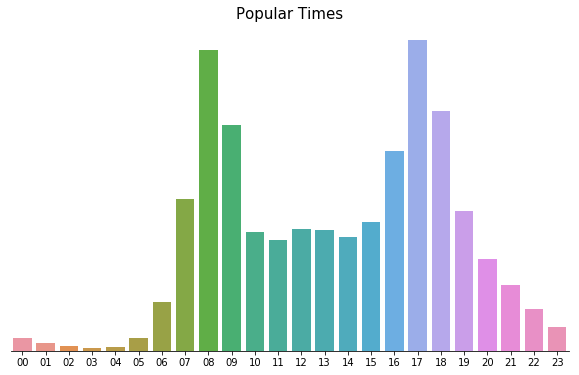

In [27]:
import seaborn as sns
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Popular Times', fontsize=15)
ax = sns.countplot(data=df_new, x='start_hour_of_day')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('');

The bikes are mostly used at 0800hrs and 1700hrs, which I assume to be the peak hours, to and from work.

### Stations

In [28]:
df_new.start_station_name.nunique()

329

There are 329 bike stations in San Fransisco Bay Area.

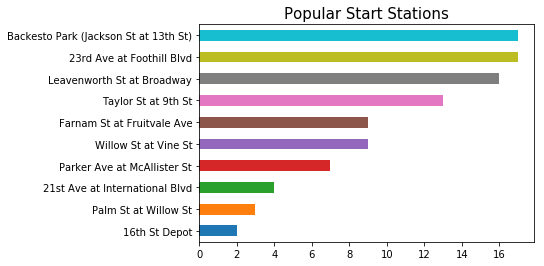

In [29]:
plt.title('Popular Start Stations', fontsize=15)
df_new.start_station_name.value_counts(ascending=True).head(10).plot.barh();

The most popular Station is 23rd Ave at Foothill Blvd.

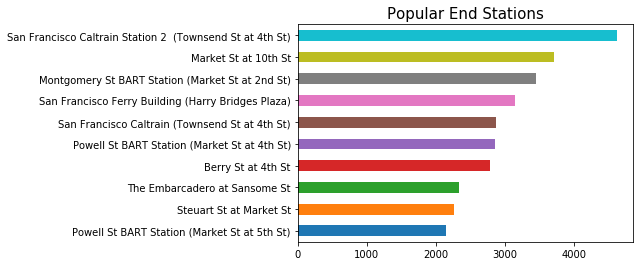

In [30]:
# Popular end stations
plt.title('Popular End Stations', fontsize=15)
df_new.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

The most trips end at San Franscisco Caltrain Station 2.

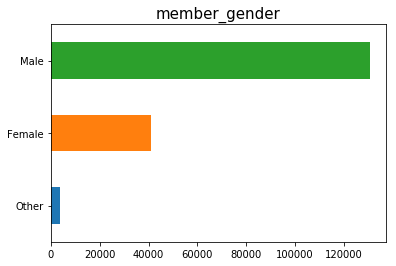

In [31]:
# ride frequency per gender
plt.title('member_gender', fontsize=15)
df_new.member_gender.value_counts(ascending=True).tail(10).plot.barh();

We see that male riders were more than double their counterparts.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip distribution in seconds is skewed to the right. The hourly duration has two peak points, during the work in and work out times.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had to create new columns for day hour and weeks to ensure we have new dfs to better analyse the data.

## Bivariate Exploration


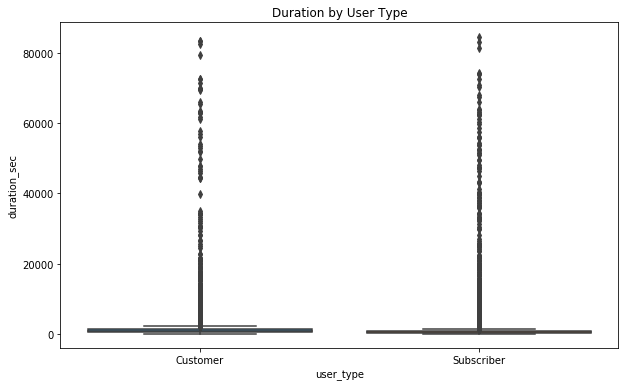

In [32]:
#To show the comparison of user type:
customer = df_new['user_type']=='Customer'
subscriber = df_new['user_type']=='Subscriber'
plt.figure(figsize=(10,6))
plt.title('Duration by User Type')
sns.boxplot(data=df_new, x='user_type', y='duration_sec');

In [33]:
# Average duration for subscriber or customer:

df_new[customer].duration_sec.mean()

1310.6561028612821

In [34]:
df_new[subscriber].duration_sec.mean()

640.55130503958685

Customers ride for longer compared to subscribers.

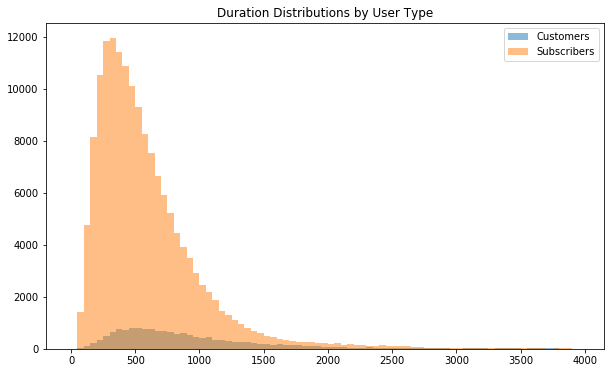

In [35]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 4000, 50)

plt.hist(df_new[customer].duration_sec, bins, alpha=0.5, label='Customers')
plt.hist(df_new[subscriber].duration_sec, bins, alpha=0.5, label='Subscribers')
plt.legend(loc='upper right')
plt.title('Duration Distributions by User Type')

plt.show()

The duration  for subscribers is more skewed to one point.

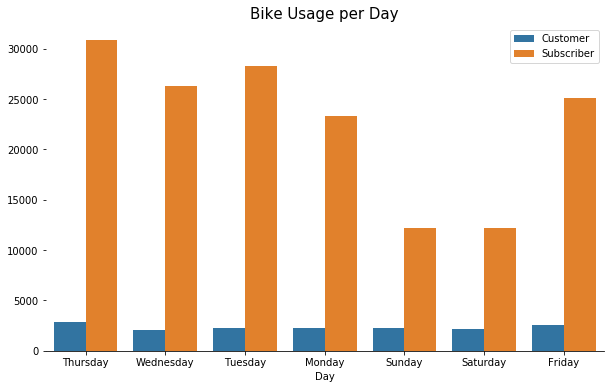

In [36]:
plt.figure(figsize=(10,6))
plt.title('Bike Usage per Day', fontsize=15)
chart = sns.countplot(data=df_new, x='start_day_of_week', hue='user_type')
chart.set(xlabel='Day', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

On all days, subscribers rode more than customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a relationship between the duration and the type of users either customer or subscriber.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Customers ride for longer compared to subscribers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

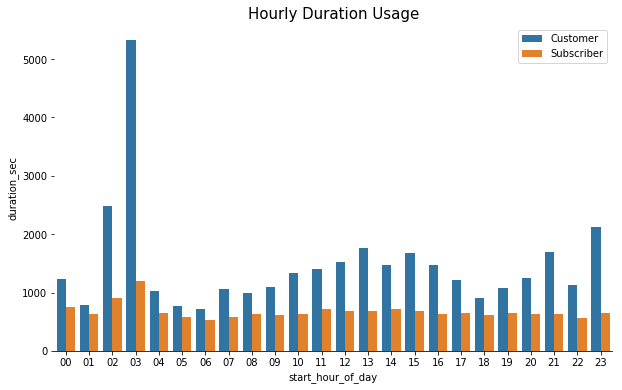

In [37]:
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
sns.barplot(data=df_new, x='start_hour_of_day', y='duration_sec', ci=None, hue='user_type')

chart.set(xlabel='start_hour_of_day', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

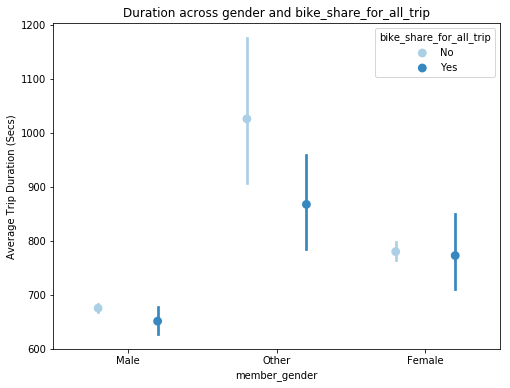

In [38]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df_new, x ='member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is a relationship between gender, bike share and the trip duration.
### Were there any interesting or surprising interactions between features?

Weird that someone was riding bikes at 3am.

## Conclusions

The findings from my analysis include:
 1. Most trips happen on weekdays as compared to weekends. Thursday had the highest number of rides.
 2. In both user types, we see the subscribers outnumbering customers.
 3. The average trip duration is 11.7 minutes.
 4. The bikes are mostly used at 0800hrs and 1700hrs, which I assume to be the peak hours, to and from work.
 5. The most popular Station is 23rd Ave at Foothill Blvd.
 6. The most trips end at San Franscisco Caltrain Station 2.
 7. Customers ride for longer compared to subscribers.
 8. We see that male riders were more than double their counterparts.

 #### Reference

https://github.com/Tiamiyu1/Ford-GoBike-System-Data-Analysis/blob/main/Ford%20GoBike%20System%20Data%20Part%201.ipynb